In [33]:
import pandas as pd
import numpy as np

df =pd.read_csv('https://raw.githubusercontent.com/AzenethSH/Estadistica/refs/heads/main/StudentPerformanceFactors.csv')

df.dropna(inplace = True)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


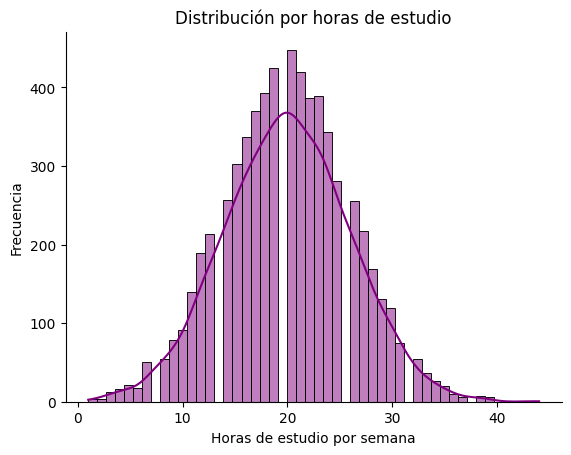

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Hours_Studied"], kde = True , color = "purple")

plt.xlabel("Horas de estudio por semana")
plt.ylabel("Frecuencia")
plt.title("Distribución por horas de estudio")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

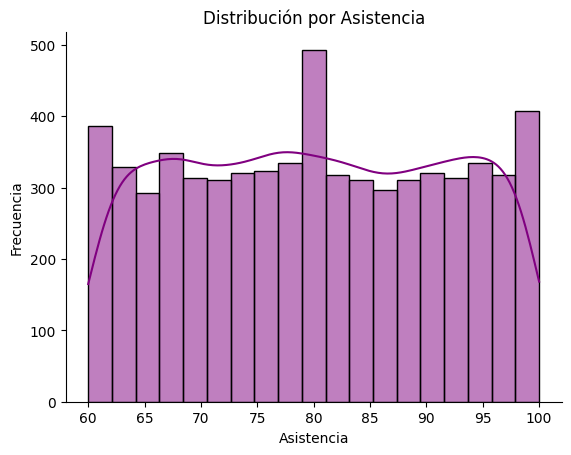

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Attendance"], kde = True , color = "purple")

plt.xlabel("Asistencia")
plt.ylabel("Frecuencia")
plt.title("Distribución por Asistencia")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

In [36]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("Exam_Score ~ C(Parental_Involvement)", data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo)
tabla_anova

# H0: no hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Parental_Involvement),2.0,2405.587354,1202.793677,80.462228,3.086485e-35
Residual,6375.0,95297.009071,14.948550,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  High    Low  -1.7334   0.0 -2.0626 -1.4042   True
  High Medium   -0.999   0.0 -1.2636 -0.7344   True
   Low Medium   0.7344   0.0  0.4363  1.0326   True
---------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  High    Low  -1.7334   0.0 -2.0626 -1.4042   True
  High Medium   -0.999   0.0 -1.2636 -0.7344   True
   Low Medium   0.7344   0.0  0.4363  1.0326   True
---------------------------------------------------


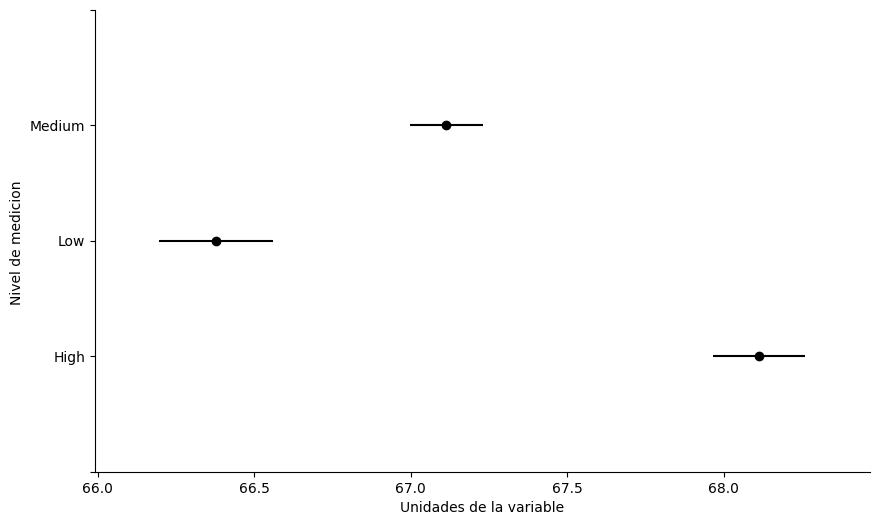

In [37]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia =0.05

tukey = pairwise_tukeyhsd(df['Exam_Score'], df['Parental_Involvement'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = "Nivel de medicion ", xlabel = "Unidades de la variable")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("")
print(tukey)

plt.title("")
print(tukey)

In [38]:
niveles = {"Low": 0, "Medium": 50, "High": 100}
df["Parental_Involvement"] = df["Parental_Involvement"].map(niveles)

df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,50,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,50,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,100,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,50,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,100,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [39]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("Exam_Score ~ C(Access_to_Resources)",data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Access_to_Resources),2.0,2752.911147,1376.455574,92.41636,2.722170e-40
Residual,6375.0,94949.685278,14.894068,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  High    Low  -1.8795   0.0 -2.2071 -1.5518   True
  High Medium  -0.9468   0.0 -1.2088 -0.6848   True
   Low Medium   0.9327   0.0   0.633  1.2323   True
---------------------------------------------------


Text(0.5, 1.0, '')

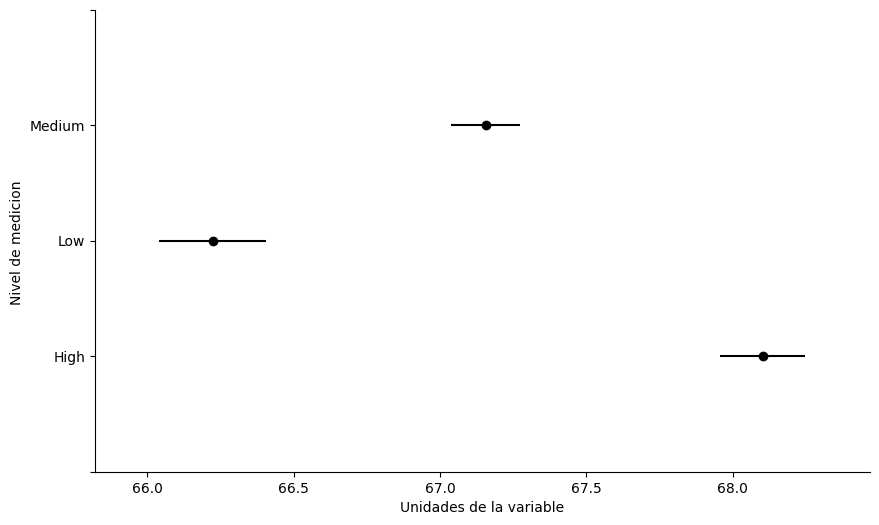

In [40]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia =0.05

tukey = pairwise_tukeyhsd(df['Exam_Score'], df['Access_to_Resources'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = "Nivel de medicion ", xlabel = "Unidades de la variable")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("")
print(tukey)

plt.title("")

In [41]:
niveles = {'Low':0, 'Medium':50, 'High':100}
df['Access_to_Resources'] = df['Access_to_Resources'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,50,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,50,50,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,50,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,50,50,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,100,50,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,50,0,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,100,100,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [42]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("Exam_Score ~ C(Extracurricular_Activities)",data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Extracurricular_Activities),1.0,388.552812,388.552812,25.457916,4.646554e-07
Residual,6376.0,97314.043614,15.262554,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    No    Yes   0.5032   0.0 0.3077 0.6987   True
-------------------------------------------------


Text(0.5, 1.0, '')

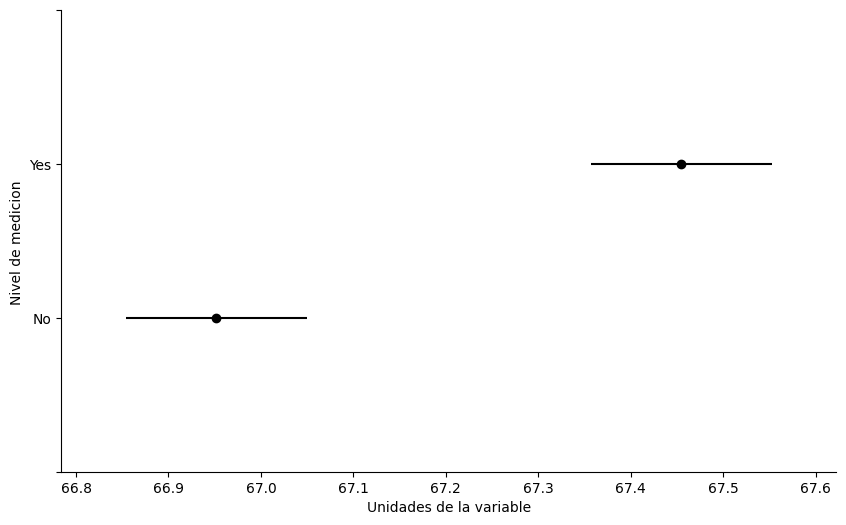

In [43]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia =0.05

tukey = pairwise_tukeyhsd(df['Exam_Score'], df['Extracurricular_Activities'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = "Nivel de medicion ", xlabel = "Unidades de la variable")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("")
print(tukey)

plt.title("")

In [44]:
niveles = {'Yes':1, 'No':0 }
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,0,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,50,0,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,50,50,1,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,50,1,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,50,50,1,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,100,50,0,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,50,0,1,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,100,100,1,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [45]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("Exam_Score ~ C(Motivation_Level)",data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Motivation_Level),2.0,776.488813,388.244407,25.535515,9.000204e-12
Residual,6375.0,96926.107612,15.204095,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  High    Low  -0.9794    0.0 -1.3115 -0.6474   True
  High Medium   -0.405 0.0048 -0.7071  -0.103   True
   Low Medium   0.5744    0.0  0.3086  0.8402   True
----------------------------------------------------


Text(0.5, 1.0, '')

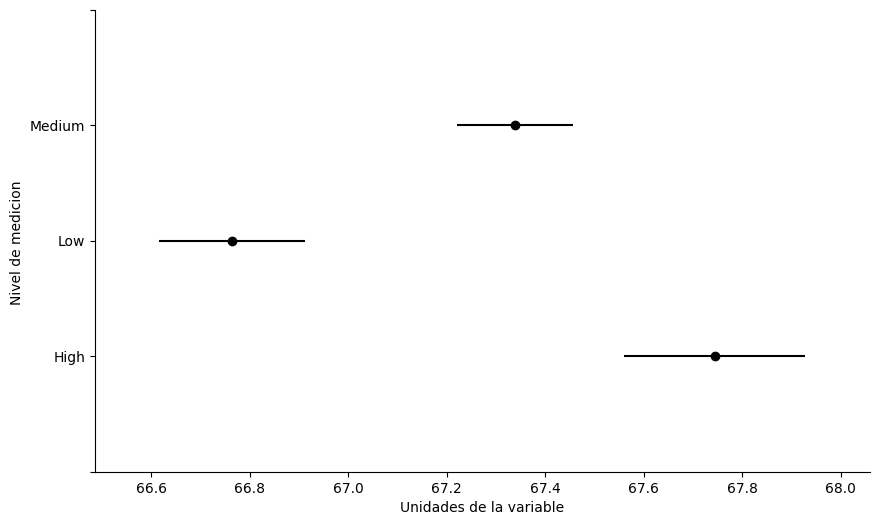

In [46]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia =0.05

tukey = pairwise_tukeyhsd(df['Exam_Score'], df['Motivation_Level'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = "Nivel de medicion ", xlabel = "Unidades de la variable")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("")
print(tukey)

plt.title("")

In [47]:
niveles = {'Low':0, 'Medium':50, 'High':100}
df['Motivation_Level'] = df['Motivation_Level'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,0,7,73,0,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,50,0,8,59,0,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,50,50,1,7,91,50,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,50,1,8,98,50,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,50,50,1,6,65,50,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,50,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,100,50,0,8,81,50,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,50,0,1,6,65,0,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,100,100,1,6,91,100,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [48]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("Exam_Score ~ C(Internet_Access)",data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Internet_Access),1.0,255.358422,255.358422,16.708173,0.000044
Residual,6376.0,97447.238003,15.283444,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    No    Yes   0.7549   0.0 0.3929 1.1169   True
-------------------------------------------------


Text(0.5, 1.0, '')

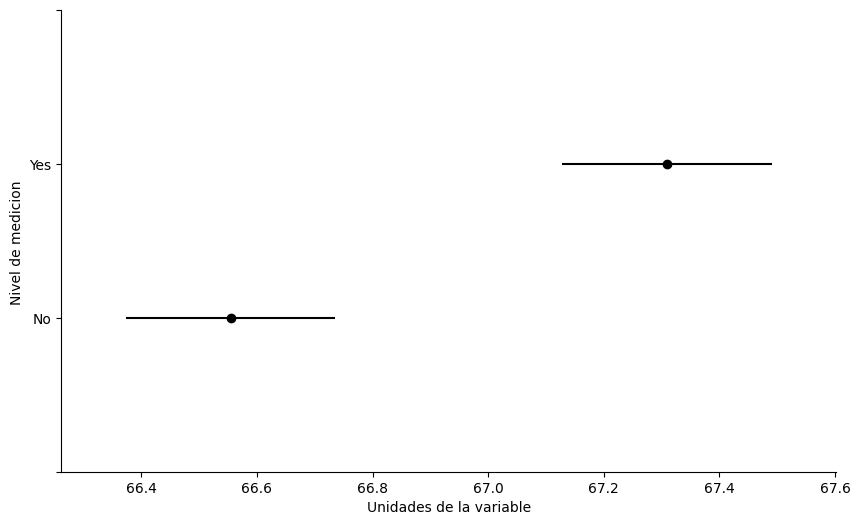

In [49]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia =0.05

tukey = pairwise_tukeyhsd(df['Exam_Score'], df['Internet_Access'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = "Nivel de medicion ", xlabel = "Unidades de la variable")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("")
print(tukey)

plt.title("")

In [50]:
niveles = {'Yes':1, 'No':0 }
df['Internet_Access'] = df['Internet_Access'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,0,7,73,0,1,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,50,0,8,59,0,1,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,50,50,1,7,91,50,1,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,50,1,8,98,50,1,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,50,50,1,6,65,50,1,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,50,1,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,100,50,0,8,81,50,1,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,50,0,1,6,65,0,1,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,100,100,1,6,91,100,1,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [51]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("Exam_Score ~ C(Family_Income)",data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Family_Income),2.0,874.339934,437.169967,28.782492,3.597672e-13
Residual,6375.0,96828.256491,15.188746,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  High    Low  -0.9882    0.0 -1.3048 -0.6717   True
  High Medium  -0.4705 0.0015 -0.7873 -0.1536   True
   Low Medium   0.5178    0.0  0.2631  0.7725   True
----------------------------------------------------


Text(0.5, 1.0, '')

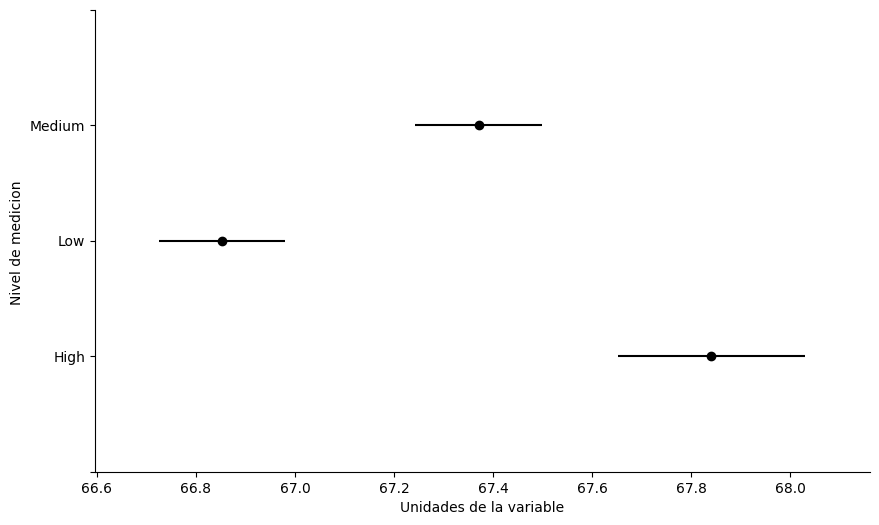

In [52]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia =0.05

tukey = pairwise_tukeyhsd(df['Exam_Score'], df['Family_Income'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = "Nivel de medicion ", xlabel = "Unidades de la variable")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("")
print(tukey)

plt.title("")

In [53]:
niveles = {'Low':0, 'Medium':50, 'High':100}
df['Family_Income'] = df['Family_Income'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,0,7,73,0,1,0,0,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,50,0,8,59,0,1,2,50,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,50,50,1,7,91,50,1,2,50,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,50,1,8,98,50,1,1,50,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,50,50,1,6,65,50,1,3,50,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,50,1,1,100,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,100,50,0,8,81,50,1,3,0,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,50,0,1,6,65,0,1,3,0,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,100,100,1,6,91,100,1,2,0,Medium,Private,Positive,3,No,High School,Far,Female,68


In [54]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("Exam_Score ~ C(Peer_Influence)",data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Peer_Influence),2.0,976.526155,488.263077,32.180333,1.242613e-14
Residual,6375.0,96726.070271,15.172717,NaN,NaN


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower  upper  reject
------------------------------------------------------
Negative  Neutral   0.6329    0.0 0.3229 0.9429   True
Negative Positive   1.0538    0.0  0.745 1.3626   True
 Neutral Positive   0.4209 0.0004 0.1638 0.6779   True
------------------------------------------------------


Text(0.5, 1.0, '')

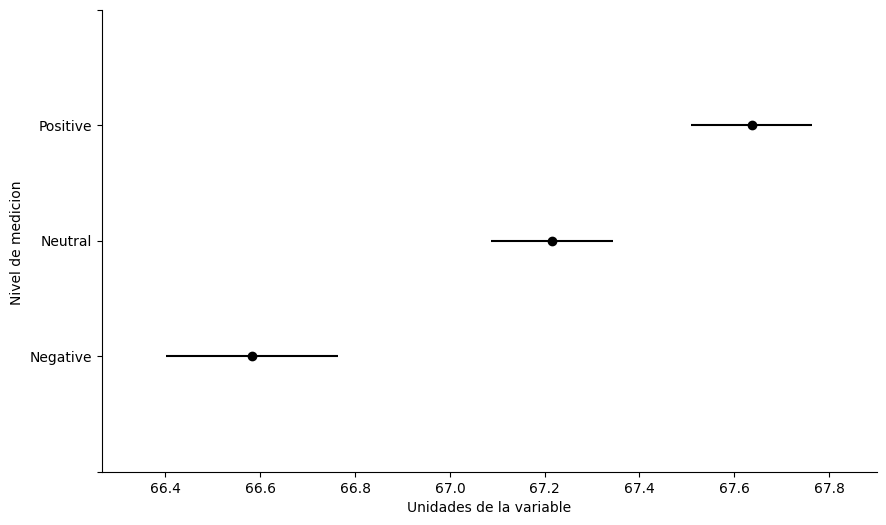

In [55]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia =0.05

tukey = pairwise_tukeyhsd(df['Exam_Score'], df['Peer_Influence'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = "Nivel de medicion ", xlabel = "Unidades de la variable")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("")
print(tukey)

plt.title("")

In [56]:
niveles = {'Negative':100, 'Neutral':0, 'Positive':100}
df['Peer_Influence'] = df['Peer_Influence'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,0,7,73,0,1,0,0,Medium,Public,100,3,No,High School,Near,Male,67
1,19,64,0,50,0,8,59,0,1,2,50,Medium,Public,100,4,No,College,Moderate,Female,61
2,24,98,50,50,1,7,91,50,1,2,50,Medium,Public,0,4,No,Postgraduate,Near,Male,74
3,29,89,0,50,1,8,98,50,1,1,50,Medium,Public,100,4,No,High School,Moderate,Male,71
4,19,92,50,50,1,6,65,50,1,3,50,High,Public,0,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,50,1,1,100,Medium,Public,100,2,No,High School,Near,Female,68
6603,23,76,100,50,0,8,81,50,1,3,0,High,Public,100,2,No,High School,Near,Female,69
6604,20,90,50,0,1,6,65,0,1,3,0,Medium,Public,100,2,No,Postgraduate,Near,Female,68
6605,10,86,100,100,1,6,91,100,1,2,0,Medium,Private,100,3,No,High School,Far,Female,68


In [57]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("Exam_Score ~ C(Learning_Disabilities)",data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Learning_Disabilities),1.0,687.937066,687.937066,45.212618,1.921126e-11
Residual,6376.0,97014.659360,15.215599,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    No    Yes  -1.0725   0.0 -1.3852 -0.7598   True
---------------------------------------------------


Text(0.5, 1.0, '')

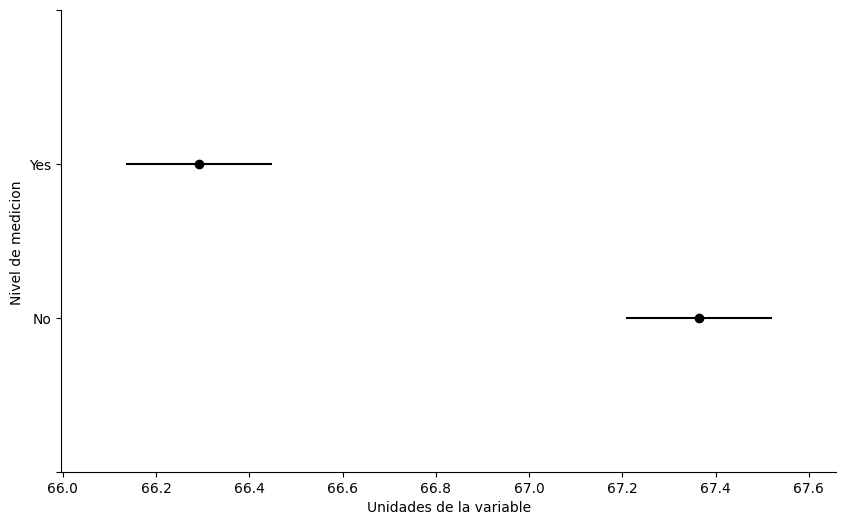

In [58]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia =0.05

tukey = pairwise_tukeyhsd(df['Exam_Score'], df['Learning_Disabilities'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = "Nivel de medicion ", xlabel = "Unidades de la variable")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("")
print(tukey)

plt.title("")

In [59]:
niveles = {'No':0, 'Yes':1}
df['Learning_Disabilities'] = df['Learning_Disabilities'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,0,7,73,0,1,0,0,Medium,Public,100,3,0,High School,Near,Male,67
1,19,64,0,50,0,8,59,0,1,2,50,Medium,Public,100,4,0,College,Moderate,Female,61
2,24,98,50,50,1,7,91,50,1,2,50,Medium,Public,0,4,0,Postgraduate,Near,Male,74
3,29,89,0,50,1,8,98,50,1,1,50,Medium,Public,100,4,0,High School,Moderate,Male,71
4,19,92,50,50,1,6,65,50,1,3,50,High,Public,0,4,0,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,50,1,1,100,Medium,Public,100,2,0,High School,Near,Female,68
6603,23,76,100,50,0,8,81,50,1,3,0,High,Public,100,2,0,High School,Near,Female,69
6604,20,90,50,0,1,6,65,0,1,3,0,Medium,Public,100,2,0,Postgraduate,Near,Female,68
6605,10,86,100,100,1,6,91,100,1,2,0,Medium,Private,100,3,0,High School,Far,Female,68


In [60]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("Exam_Score ~ C(Parental_Education_Level)",data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Parental_Education_Level),2.0,1089.555877,544.777939,35.947108,2.990498e-16
Residual,6375.0,96613.040548,15.154987,NaN,NaN


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2    meandiff p-adj   lower   upper  reject
---------------------------------------------------------------
    College  High School  -0.4635 0.0001 -0.7268 -0.2002   True
    College Postgraduate   0.6142    0.0  0.2856  0.9429   True
High School Postgraduate   1.0778    0.0  0.7754  1.3801   True
---------------------------------------------------------------


Text(0.5, 1.0, '')

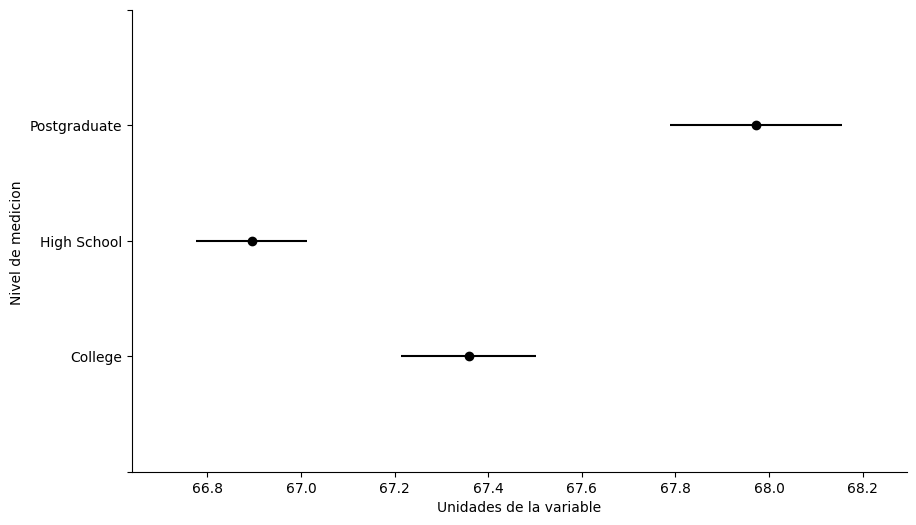

In [61]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia =0.05

tukey = pairwise_tukeyhsd(df['Exam_Score'], df['Parental_Education_Level'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = "Nivel de medicion ", xlabel = "Unidades de la variable")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("")
print(tukey)

plt.title("")

In [62]:
niveles = {'High School':1, 'College':2, 'Postgraduate':3}
df['Parental_Education_Level'] = df['Parental_Education_Level'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,0,7,73,0,1,0,0,Medium,Public,100,3,0,1,Near,Male,67
1,19,64,0,50,0,8,59,0,1,2,50,Medium,Public,100,4,0,2,Moderate,Female,61
2,24,98,50,50,1,7,91,50,1,2,50,Medium,Public,0,4,0,3,Near,Male,74
3,29,89,0,50,1,8,98,50,1,1,50,Medium,Public,100,4,0,1,Moderate,Male,71
4,19,92,50,50,1,6,65,50,1,3,50,High,Public,0,4,0,2,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,50,1,1,100,Medium,Public,100,2,0,1,Near,Female,68
6603,23,76,100,50,0,8,81,50,1,3,0,High,Public,100,2,0,1,Near,Female,69
6604,20,90,50,0,1,6,65,0,1,3,0,Medium,Public,100,2,0,3,Near,Female,68
6605,10,86,100,100,1,6,91,100,1,2,0,Medium,Private,100,3,0,1,Far,Female,68


In [63]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("Exam_Score ~ C(Distance_from_Home)",data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Distance_from_Home),2.0,758.421410,379.210705,24.936704,1.630308e-11
Residual,6375.0,96944.175015,15.206929,NaN,NaN


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1   group2  meandiff p-adj lower  upper  reject
-----------------------------------------------------
     Far Moderate   0.4882 0.017 0.0705 0.9059   True
     Far     Near   1.0154   0.0 0.6237  1.407   True
Moderate     Near   0.5272   0.0 0.2722 0.7822   True
-----------------------------------------------------


Text(0.5, 1.0, '')

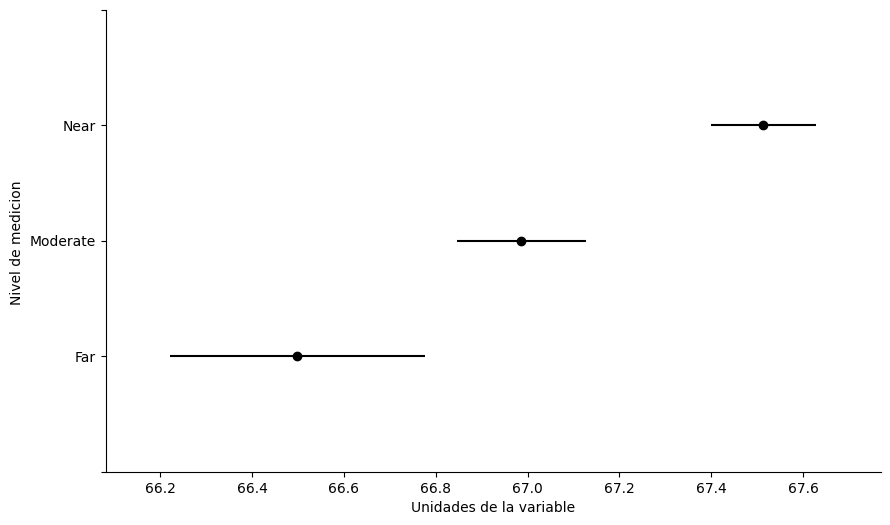

In [64]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia =0.05

tukey = pairwise_tukeyhsd(df['Exam_Score'], df['Distance_from_Home'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = "Nivel de medicion ", xlabel = "Unidades de la variable")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("")
print(tukey)

plt.title("")

In [65]:
niveles = {'Near':1, 'Moderate':2, 'Far':3}
df['Distance_from_Home'] =  df['Distance_from_Home'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,0,7,73,0,1,0,0,Medium,Public,100,3,0,1,1,Male,67
1,19,64,0,50,0,8,59,0,1,2,50,Medium,Public,100,4,0,2,2,Female,61
2,24,98,50,50,1,7,91,50,1,2,50,Medium,Public,0,4,0,3,1,Male,74
3,29,89,0,50,1,8,98,50,1,1,50,Medium,Public,100,4,0,1,2,Male,71
4,19,92,50,50,1,6,65,50,1,3,50,High,Public,0,4,0,2,1,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,50,1,1,100,Medium,Public,100,2,0,1,1,Female,68
6603,23,76,100,50,0,8,81,50,1,3,0,High,Public,100,2,0,1,1,Female,69
6604,20,90,50,0,1,6,65,0,1,3,0,Medium,Public,100,2,0,3,1,Female,68
6605,10,86,100,100,1,6,91,100,1,2,0,Medium,Private,100,3,0,1,3,Female,68


In [66]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("Exam_Score ~ C(Teacher_Quality)", data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo)
tabla_anova

#H0: no hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Teacher_Quality),2.0,566.739816,283.369908,18.59749,8.844704e-09
Residual,6375.0,97135.856609,15.236997,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  High    Low   -0.906    0.0 -1.3224 -0.4896   True
  High Medium  -0.5632    0.0 -0.8198 -0.3066   True
   Low Medium   0.3428 0.0971 -0.0462  0.7318  False
----------------------------------------------------


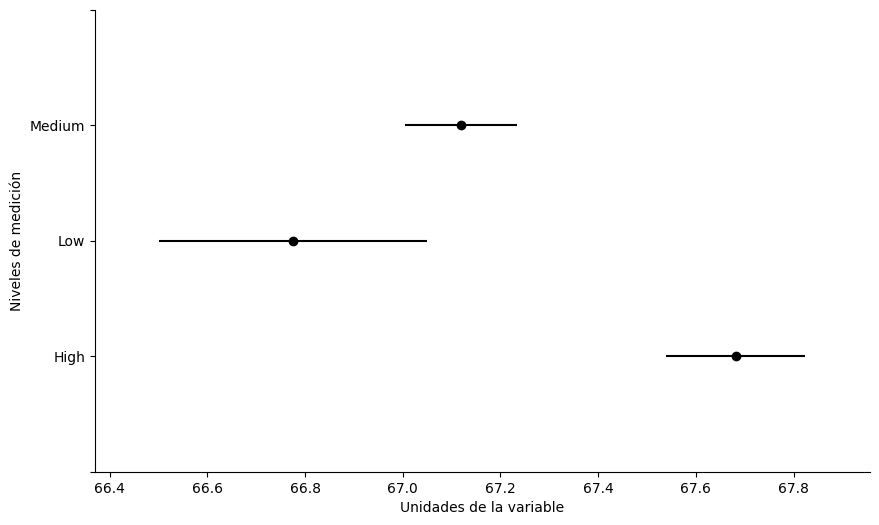

In [67]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df["Exam_Score"], groups = df["Teacher_Quality"], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = "Niveles de medición", xlabel = "Unidades de la variable")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.title("")
print(tukey)

In [68]:
niveles = {"Low": 0, "Medium": 0, "High": 1}
df["Teacher_Quality"] = df["Teacher_Quality"].map(niveles)

df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,0,7,73,0,1,0,0,0,Public,100,3,0,1,1,Male,67
1,19,64,0,50,0,8,59,0,1,2,50,0,Public,100,4,0,2,2,Female,61
2,24,98,50,50,1,7,91,50,1,2,50,0,Public,0,4,0,3,1,Male,74
3,29,89,0,50,1,8,98,50,1,1,50,0,Public,100,4,0,1,2,Male,71
4,19,92,50,50,1,6,65,50,1,3,50,1,Public,0,4,0,2,1,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,50,1,1,100,0,Public,100,2,0,1,1,Female,68
6603,23,76,100,50,0,8,81,50,1,3,0,1,Public,100,2,0,1,1,Female,69
6604,20,90,50,0,1,6,65,0,1,3,0,0,Public,100,2,0,3,1,Female,68
6605,10,86,100,100,1,6,91,100,1,2,0,0,Private,100,3,0,1,3,Female,68


In [69]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("Exam_Score ~ C(School_Type)", data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo)
tabla_anova

#No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(School_Type),1.0,11.540237,11.540237,0.753196,0.385499
Residual,6376.0,97691.056188,15.321684,NaN,NaN


In [70]:
df.drop(columns = ['School_Type'], inplace = True)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,0,7,73,0,1,0,0,0,100,3,0,1,1,Male,67
1,19,64,0,50,0,8,59,0,1,2,50,0,100,4,0,2,2,Female,61
2,24,98,50,50,1,7,91,50,1,2,50,0,0,4,0,3,1,Male,74
3,29,89,0,50,1,8,98,50,1,1,50,0,100,4,0,1,2,Male,71
4,19,92,50,50,1,6,65,50,1,3,50,1,0,4,0,2,1,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,50,1,1,100,0,100,2,0,1,1,Female,68
6603,23,76,100,50,0,8,81,50,1,3,0,1,100,2,0,1,1,Female,69
6604,20,90,50,0,1,6,65,0,1,3,0,0,100,2,0,3,1,Female,68
6605,10,86,100,100,1,6,91,100,1,2,0,0,100,3,0,1,3,Female,68


In [71]:
df.drop(columns = ['Gender'], inplace = True)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score
0,23,84,0,100,0,7,73,0,1,0,0,0,100,3,0,1,1,67
1,19,64,0,50,0,8,59,0,1,2,50,0,100,4,0,2,2,61
2,24,98,50,50,1,7,91,50,1,2,50,0,0,4,0,3,1,74
3,29,89,0,50,1,8,98,50,1,1,50,0,100,4,0,1,2,71
4,19,92,50,50,1,6,65,50,1,3,50,1,0,4,0,2,1,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,50,1,1,100,0,100,2,0,1,1,68
6603,23,76,100,50,0,8,81,50,1,3,0,1,100,2,0,1,1,69
6604,20,90,50,0,1,6,65,0,1,3,0,0,100,2,0,3,1,68
6605,10,86,100,100,1,6,91,100,1,2,0,0,100,3,0,1,3,68


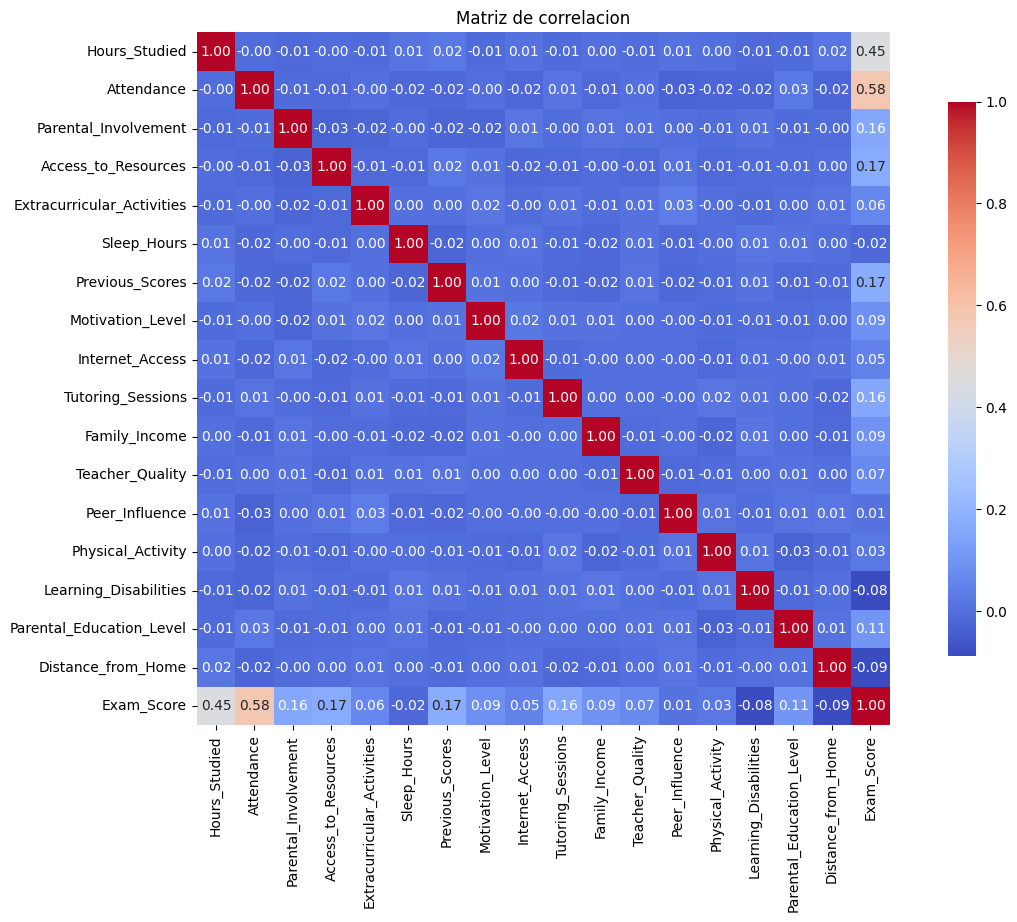

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

matriz_de_correlacion = df.corr()
plt.figure(figsize =(15, 9))
sns.heatmap(matriz_de_correlacion, annot = True, cmap = 'coolwarm', fmt = ".2f", square = True, cbar_kws = {"shrink": 0.8})
plt.title('Matriz de correlacion')
plt.show()

coeficiente de determinacion: 0.6584829879528364


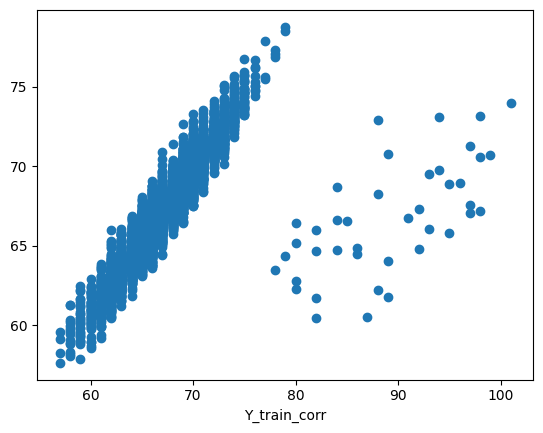

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = df[["Hours_Studied", "Attendance", "Parental_Involvement", "Access_to_Resources", "Previous_Scores", "Tutoring_Sessions", "Peer_Influence", "Parental_Education_Level"]]
Y = df["Exam_Score"]

x_train, X_test, Y_train_corr, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

X_train_constante = sm.add_constant(x_train)
modelo = sm.OLS(Y_train_corr, X_train_constante).fit()
Yc = modelo.predict(X_train_constante)
X_test_constante = sm.add_constant(X_test)

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.scatter(Y_train_corr, Yc)
plt.xlabel("Y_train_corr")
r2 = r2_score(Y_train_corr, Yc)
print("coeficiente de determinacion:", r2)

In [75]:
b0, b1, b2, b3, b4, b5, b6, b7, b8 = modelo.params

fun = lambda x1, x2, x3, x4, x5, x6, x7, x8: b0 + b1*x1 + b2*x2 + b3*x3 + b4*x4 + b5*x5 + b6*x6 + b7*x7 + b8*x8

fun(15, 50, 50, 50, 70, 2, 0, 2)

59.72094635194089

In [76]:
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(modelo.resid, X_train_constante)
print(valor_p_bp)

0.9822210779213867


In [77]:
from statsmodels.formula.api import ols

modelo_2 = ols( "Exam_Score ~ C(Hours_Studied) + C(Attendance) + C(Parental_Involvement) + C(Access_to_Resources) + C(Previous_Scores) + C(Tutoring_Sessions) + C(Peer_Influence) + C(Parental_Education_Level)", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_2)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Hours_Studied),40.0,20174.757867,504.368947,98.444703,0.000000e+00
C(Attendance),40.0,33198.551310,829.963783,161.995575,0.000000e+00
C(Parental_Involvement),2.0,2642.498008,1321.249004,257.886545,2.483665e-108
C(Access_to_Resources),2.0,3160.211664,1580.105832,308.411233,1.905225e-128
C(Previous_Scores),50.0,3212.629741,64.252595,12.541073,2.848612e-95
C(Tutoring_Sessions),8.0,2447.740420,305.967552,59.719943,2.026229e-94
C(Peer_Influence),1.0,45.172252,45.172252,8.816897,2.995908e-03
C(Parental_Education_Level),2.0,892.173626,446.086813,87.068968,5.070978e-38
Residual,6232.0,31928.861537,5.123373,NaN,NaN


In [ ]:
"""
Hours_Studied Distribucion normal, no se aprecian atipicos
Attendance, Distribucion uniforme, no se aprecian atipicos
Parental_Involveme, Niveles de medicion, Low:0, Medium:50, hight:100 segun aumenta la participacion parental, se observa el aumento en la calificacion del alumno.
Access_to_Resources,  Niveles de medicion, Low:0, Medium:50, hight:100, segun aumenta el acceso a recursos, se observa el aumento en la calificacion del alumno.
Extracurricular_Activities, niveles de medicion, Yes:1, No:0, segun el estudiante con actividades extracurriculares, se observa el aumento en la calificacion del alumno.
Sleep_Hours_Previous_Scores, Distribucion normal, no se aprecian atipicos
Motivation_Level, Niveles de medicion, Low:0, Medium:50, hight:100, segun aumenta el nivel de motivacion, se observa el aumento en la calificacion del alumno.
Internet_Access, niveles de medicion, Yes:1, No:0, segub el estudiante con acceso a internet, se observa el aumento en la calificacion del alumno.
Tutoring_Sessions,  Distribucion gama , no se aprecian valores atipicoz, valores discretos.
Family_Income, Niveles de medicion, Low:0, Medium:50, hight:100, segun aumenta el nivel de ingreso familiar, se observa el aumento en la calificacion del alumno.
Teacher_Quality, Niveles de medicion, Low:0, Medium:0, hight:1, La calidad del profesor aumenta la calificacion del alumno.
School_Type, no hay diferencia significativa entre grupos
Peer_Influence, Niveles de medicion, Negative:100, Neutral:0, Positive:100, segun aumenta el nivel de influencia del profesor, se observa el aumento en la calificacion del alumno.
Physical_Activity, Distribucion uniforme, no se aprecian atipicos
Learning_Disabilities, niveles de medicion, No:0, Yes:1, segun el estudiante con discapacidades, se observa el aumento en la calificacion del alumno.
Parental_Education_Level, Niveles de medicion, High School:1, College:2, Postgraduate:3, segun aumenta el nivel de educacion parental, se observa el aumento en la calificacion del alumno.
Distance_from_Home, niveles de medicion, Near:1, Moderate:2, Far:3, segun aumenta la distancia de casa, se observa el aumento en la calificacion del alumno.
Gender, no hay diferencia significativa entre grupos
Exam_Score, Distribucion normal, no se aprecian atipicos
"""